In [12]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
json_file_path = "data.json"
with open (json_file_path, "r") as fle:
    filt = json.load(fle)
fle.close()

In [33]:
new_dict={}
count=0
for k,v,in filt.items():
        for k1,v1 in v.items():
            if not k1 in ["restaurants","link"]:
                for k1_,v1_ in v1.items():
                    if k1_=="restaurants":
                        for k2,v2, in v1_.items():
                                lst=[]
                                count+=1
                                lst.append(k2)
                                lst.append(k)
                                lst.append(k1)
                                if v2.get("price")== None:
                                    for k3,v3 in v2.items():
                                        lst.append(v3)
                                        new_dict.update({str(count):lst})

            elif k1=="restaurants":
                 for k2,v2, in v1.items():
                        lst=[]
                        count+=1
                        lst.append(k2)
                        lst.append(k)
                        lst.append(k)
                        if v2.get("price")== None:
                            for k3,v3 in v2.items():
                                lst.append(v3)
                                new_dict.update({str(count):lst})

In [38]:
dd=pd.DataFrame.from_dict(new_dict,orient='index',columns=["id","city","sub_region","name","rating","rating_count","cost-₹","address","cuisine","lic_no","menu","link"])
dd.head()

,id,city,sub_region,name,rating,rating_count,cost-₹,address,cuisine,lic_no,menu,link
1,567335,Abohar,Abohar,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...
2,531342,Abohar,Abohar,Janta Sweet House,4.4,50+ ratings,₹ 200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",12117201000112,{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...
3,158203,Abohar,Abohar,theka coffee desi,3.8,100+ ratings,₹ 100,"theka coffee desi, sahtiya sadan road city",Beverages,22121652000190,{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...
4,187912,Abohar,Abohar,Singh Hut,3.7,20+ ratings,₹ 250,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR","Fast Food,Indian",22119652000167,{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...
5,543530,Abohar,Abohar,GRILL MASTERS,--,Too Few Ratings,₹ 250,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","Italian-American,Fast Food",12122201000053,"{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...


In [39]:
dd.rating.unique()
dd.drop(dd[dd.rating=="NA"].index,inplace=True)
dd.rating=dd.rating.replace("--","0.0").astype(float)
dd.shape

(155696, 12)

In [40]:
dd["cost-₹"].unique()
dd["cost-₹"]=dd["cost-₹"].str.replace("₹ ","")
dd.drop(dd[dd["cost-₹"]=="NA"].index,inplace=True)
dd.drop(dd[dd.lic_no=="license"].index,inplace=True)
dd["cost-₹"]=dd["cost-₹"].astype(int)

In [49]:
dd.head(2)

,id,city,sub_region,name,rating,rating_count,cost-₹,address,cuisine,lic_no,menu,link
1,567335,Abohar,Abohar,AB FOODS POINT,0.0,Too Few Ratings,200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...
2,531342,Abohar,Abohar,Janta Sweet House,4.4,50+ ratings,200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",12117201000112,{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...


### 1. Restaurant with Maximum rating throughout the dataset

In [41]:
dd.name.loc[(dd.rating==dd.rating.max())&(dd.rating_count=="100+ ratings")].item()

'SHRI KRISHNA FOOD ZONE'

### 2. Number of cities with least number of restaurants listed 

In [42]:
for k,y in dd.groupby(['city'])['name'].count()[dd.groupby(['city'])['name'].count() == dd.groupby(['city'])['name'].count().min()].items():
    print(k)

Darjeeling
Hampi
Kohima
Kumta
Manali
Rangpo


### 3. Top 10 cities as per the number of restaurants listed?


Text(0.5, 1.0, 'Top 10 cities as per the number of restaurants listed')

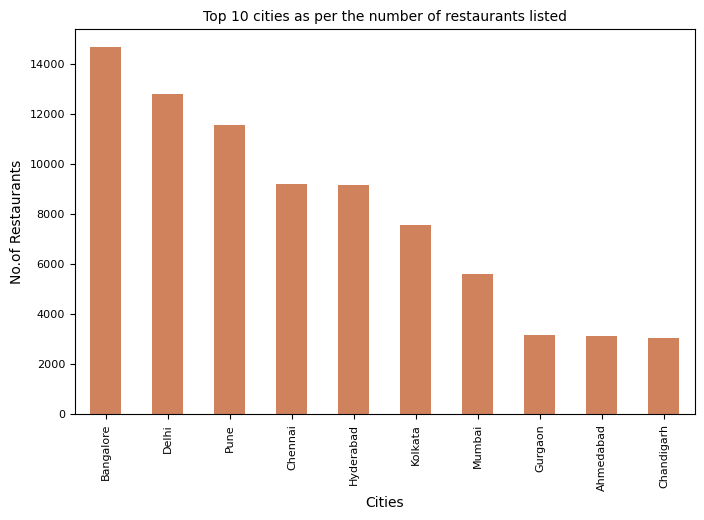

In [43]:
dd.groupby(['city'])['name'].count().sort_values(ascending=False)[:10].plot(color="#D0825D",kind="bar",figsize=(8, 5),fontsize=8)
plt.xlabel("Cities", fontsize=10)
plt.ylabel("No.of Restaurants", fontsize=10)
plt.title("Top 10 cities as per the number of restaurants listed", fontsize=10)

### 4. Most popular Cuisines served throughout the dataset?

In [44]:
temp_tbl = dd[['city',"id",'cuisine']]
temp_tbl = temp_tbl.assign(cuisine=temp_tbl.cuisine.str.split(",")).explode("cuisine")
temp_tbl.cuisine=temp_tbl.cuisine.str.lower()
temp_tbl.cuisine.value_counts().sort_values(ascending=False).idxmax()

'chinese'

### 5. Which city is having the least expensive restaurant in terms of cost? 

In [46]:
for i in dd.city.loc[dd["cost-₹"]==dd["cost-₹"].min()].unique():
    print(i)

Bangalore
Biharsharif
Chandigarh
Chennai
Delhi
Erode
Faridkot
Gorakhpur
Gurgaon
Hapur
Hyderabad
Jhunjhunu
Kakinada
Kanpur
Kolkata
Kollam
Lucknow
Ludhiana
Madurai
Modinagar
Mumbai
Muzaffarpur
Nagpur
Pune
Sikar
Theni
Tirupur
Wardha


### 6. Top 5 most popular restaurant chains in India?

Text(0.5, 1.0, 'Top 5 Most popular restaurant chains in India')

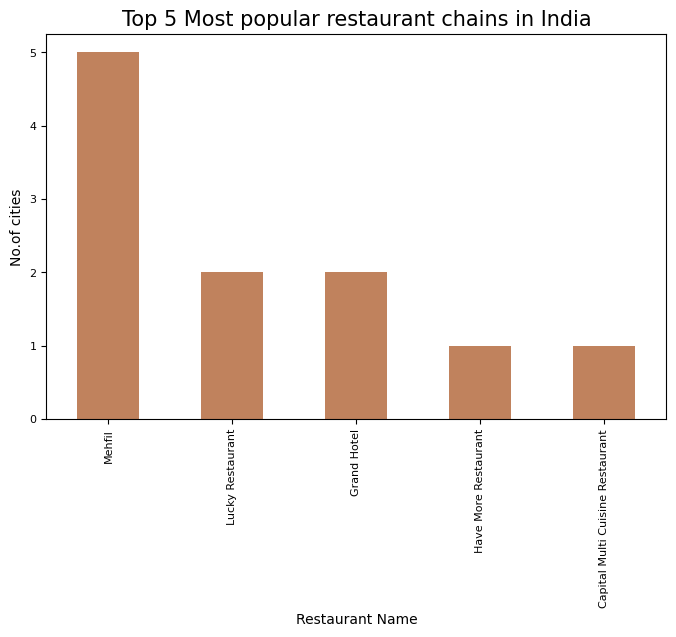

In [47]:
dd.name.loc[dd.rating_count=='10K+ ratings'].value_counts()[:5].plot(color="#C0825D",kind="bar",figsize=(8, 5),fontsize=8)
plt.xlabel("Restaurant Name", fontsize=10)
plt.ylabel("No.of cities", fontsize=10)
plt.title("Top 5 Most popular restaurant chains in India", fontsize=15)

### 7. Which restaurant in Banglore has the most number of people visited? 

In [48]:
dd.name.loc[(dd.city=="Bangalore")&(dd.rating_count=='5K+ ratings')&(dd.rating==4.5)].item()

'Truffles'